In [2]:
# Author(s): Haley Botteron
import numpy as np
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import pylab
from pylab import plot, ylim, xlim, show, xlabel, ylabel, grid
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_fraction = 0.4
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
def plot_blinks_discomfort(name,threshold,graphstop=500,yvalue=8):   # Enter 'name'  as a string, i.e. in quotes
    import csv
    filename = name + '_Data.txt'
    with open (filename, 'rb') as datafile:
        data = np.genfromtxt(datafile, delimiter = '\t', names=True,dtype=None)
    Blinks=[]
    data[:8,]
    for i in range (len(data['rmse'])):
        if np.any(data['rmse'][i] >= threshold or data['false_negative'][i] == 1):  
            if np.any(data['false_positive'][i] == 0):
            # then we're in a blink
                Blinks.append(data['time_lined_up'][i])
    #  When this finishes, Blinks is a vector in which every entry is a time point when
    #    the eyes are close
   
    blinksfilename = 'Blinks'+name+'.txt'
    writer = csv.writer(open(blinksfilename, 'w'), dialect='excel')
    for timevalue in Blinks:
        writer.writerow([timevalue])

    ys = yvalue * np.ones(len(Blinks))
    plot(Blinks, ys, "b|")
    plt.xlabel('Time')
    plt.ylabel('Discomfort')
    plt.title('       '+name)
    if graphstop<500 :
        x1,x2,y1,y2 = plt.axis()
        plt.axis((0,graphstop,0,y2))
    
    ratingsfilename = name + 'Ratings.txt'
    with open(ratingsfilename,'rb') as datafile:
        ratings = np.genfromtxt(datafile, delimiter = '\t',names=True,dtype=None)
   
    plot(ratings['time'], ratings['discomfort'], "-")
   

In [4]:
# time spent in blink 
def blinks_time(name, fps):   # Enter 'name'  as a string, i.e. in quotes
    import csv
    filename = 'Blinks' + name + '.txt'
    with open (filename, 'rb') as datafile:
        data = np.genfromtxt(datafile, delimiter = '\t')
    if fps == 60:
        timeinblinks = len(data)*.016667
        print len(data)
    if fps == 30:
        timeinblinks = len(data)*.033333
        print len(data)

    print 'total time spent in blinks: ' 
    print timeinblinks

In [5]:
def first_blink(name): ## Finds first blink of each trial
    filename1 = 'Blinks' + name + '.txt'
    firstBlink=[]
    with open (filename1, 'rb') as datafile:
        dataBlink = np.genfromtxt(datafile, delimiter = '\t')
        filename2 = name + '_Data.txt'
        with open (filename2, 'rb') as datafile:
            dataBlock = np.genfromtxt(datafile, delimiter = '\t', names=True,dtype=None)
            found = False
            fb1 = None
            fb2 = None
            fb3 = None
            fb4 = None
            fb5 = None
    
            for m in range (len(dataBlock['block'])):
                found = False
                if dataBlock['time_lined_up'][m]<65 and  dataBlock['time_lined_up'][m]> 2 and dataBlock['block'][m] == 'dont':
                        for i in range (len(dataBlink)):
                            if (dataBlink[i] >2 and dataBlink[i] < dataBlock['time_lined_up'][m]): 
                                found = True
                                fb1 = dataBlink[i] 
                                break             
                                 
            for m in range (len(dataBlock['block'])):
                found = False
                if dataBlock['time_lined_up'][m]<155 and  dataBlock['time_lined_up'][m]> 92 and dataBlock['block'][m] == 'dont':
                        for i in range (len(dataBlink)):
                            if (dataBlink[i] >92 and dataBlink[i] <dataBlock['time_lined_up'][m]): 
                                found == True
                                fb2 = dataBlink[i]
                                break
     
            for m in range (len(dataBlock['block'])):
                found = False
                if dataBlock['time_lined_up'][m]<245 and  dataBlock['time_lined_up'][m]> 182 and dataBlock['block'][m] == 'dont':
                        for i in range (len(dataBlink)):
                            if (dataBlink[i] >182 and dataBlink[i] <dataBlock['time_lined_up'][m]): 
                                found = True
                                fb3 = dataBlink[i]
                                break
       
            for m in range (len(dataBlock['block'])):
                found = False
                if dataBlock['time_lined_up'][m]<335 and  dataBlock['time_lined_up'][m]> 272 and dataBlock['block'][m] == 'dont':
                    for i in range (len(dataBlink)):
                        if (dataBlink[i] >272 and dataBlink[i] <dataBlock['time_lined_up'][m]):
                            found =True
                            fb4 = dataBlink[i]  
                            break

            for m in range (len(dataBlock['block'])):
                found = False
                if dataBlock['time_lined_up'][m]<425 and  dataBlock['time_lined_up'][m]> 362 and dataBlock['block'][m] == 'dont':
                    for i in range (len(dataBlink)):
                        if (dataBlink[i] >362 and dataBlink[i] < dataBlock['time_lined_up'][m]): 
                            found = True
                            fb5 = dataBlink[i]       
                            break
      
            firstBlink.append(fb1)
            firstBlink.append(fb2)
            firstBlink.append(fb3)
            firstBlink.append(fb4)
            firstBlink.append(fb5)
            print firstBlink     
            
        firstblinksfilename = 'FirstBlinks'+name+'.txt'
        writer = csv.writer(open(firstblinksfilename, 'w'), dialect='excel')
        for timevalue in firstBlink:
            writer.writerow([timevalue])           
            


In [6]:
def blinkList(name): ### Outputs binary list of times in blink
    filename1 = 'Blinks' + name + '.txt'
    blinkList = []
    with open (filename1, 'rb') as datafile:
        blink = np.genfromtxt(datafile, delimiter = '\t')
        blinkList.append(blink[0])
        for i in range (len(blink)):
            if (blink[i] -(blink[i-1]) > .05):
                blinkList.append(blink[i])
                
       
    blinklistfilename = 'BlinkList'+name+'.txt'
    writer = csv.writer(open(blinklistfilename, 'w'), dialect='excel')
    for timevalue in blinkList:
        writer.writerow([timevalue])     
    

In [7]:
def scaled_plot_first_blink(name):##Plots scaled discomfort for each trail leading up to first blink
    filename1 =  name + 'Ratings.txt'
    with open (filename1, 'rb') as datafile:
        ratings = np.genfromtxt(datafile, delimiter = '\t', names=True,dtype=None)
        filename2 = "FirstBlinks" +name + '.txt'
        with open (filename2, 'rb') as datafile:
            firstBlink = np.genfromtxt(datafile, delimiter = '\t')
            filename3 = "zscore" +name + '.txt'
            with open (filename3, 'rb') as datafile:
                zscore = np.genfromtxt(datafile, delimiter = ',')     
            
    ## TRIAL 1 #
    totalDiscomfort = []
    totalTime = []
    time1=[]
    discomfort1= []  
    for i in range (len(ratings['time'])):
        if  np.isnan(firstBlink[0])== True:
            if (ratings['block'][i] == "Don't blink" and ratings['time'][i]<65):
                time1.append(ratings['time'][i])
                discomfort1.append(zscore[i][1])
        elif (ratings['time'][i] < firstBlink[0]):
            time1.append(ratings['time'][i])
            discomfort1.append(zscore[i][1])   
    totalDiscomfort = totalDiscomfort + discomfort1
    totalTime = totalTime + time1    
    plt.xlabel('Time')
    plt.ylabel('Scaled Discomfort')
    plt.title('       '+name)
    
    ## TRIAL 2 #
    time2=[]
    discomfort2= []
    for i in range (len(ratings['time'])):
        if (ratings['time'][i]> 88 and ratings['time'][i] < 160 and ratings['block'][i] == "Don't blink"):
            start2 = ratings['time'][i]
            break
    for i in range (len(ratings['time'])):
        if  np.isnan(firstBlink[1])== True:
            if (ratings['time'][i]> 88 and ratings['time'][i] < 160 and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]- start2
                time2.append(time)
                discomfort2.append(zscore[i][1])     
        elif (ratings['time'][i] < firstBlink[1]):
            if (ratings['time'][i]> 88 and ratings['time'][i] < firstBlink[1] and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start2
                time2.append(time)
                discomfort2.append(zscore[i][1])  
    totalDiscomfort = totalDiscomfort + discomfort2
    totalTime = totalTime + time2 
    
    ## TRIAL 3#
    time3=[]
    discomfort3= []
    for i in range (len(ratings['time'])):
        if (ratings['time'][i]> 178 and ratings['time'][i] < 250 and ratings['block'][i] == "Don't blink"):
            start3 = ratings['time'][i]
            break
    for i in range (len(ratings['time'])):
        if np.isnan(firstBlink[2])==True:
            if (ratings['time'][i]> 178 and ratings['time'][i] < 250 and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start3
                time3.append(time)
                discomfort3.append(zscore[i][1])
        elif (ratings['time'][i] < firstBlink[2]):
            if (ratings['time'][i]> 178 and ratings['time'][i] < firstBlink[2] and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start3
                time3.append(time)
                discomfort3.append(zscore[i][1])  
    totalDiscomfort = totalDiscomfort + discomfort3
    totalTime = totalTime + time3    
    ## TRIAL 4#
    time4=[]
    discomfort4= []
    for i in range (len(ratings['time'])):
        if (ratings['time'][i]> 268 and ratings['time'][i] < 340 and ratings['block'][i] == "Don't blink"):
            start4 = ratings['time'][i]
            break
    for i in range (len(ratings['time'])):
        if np.isnan(firstBlink[3])==True:
            if (ratings['time'][i]> 268 and ratings['time'][i] < 340 and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start4
                time4.append(time)
                discomfort4.append(zscore[i][1])  
        elif (ratings['time'][i] < firstBlink[3]):
            if (ratings['time'][i]> 268 and ratings['time'][i] < firstBlink[3] and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start4
                time4.append(time)
                discomfort4.append(zscore[i][1]) 
    totalDiscomfort = totalDiscomfort + discomfort4
    totalTime = totalTime + time4
  
    ## TRIAL 5#
    time5=[]
    discomfort5= []
    for i in range (len(ratings['time'])):
        if (ratings['time'][i]> 348 and ratings['time'][i] < 430 and ratings['block'][i] == "Don't blink"):
            start5 = ratings['time'][i]
            break
    for i in range (len(ratings['time'])):
        if np.isnan(firstBlink[4])==True:
            if (ratings['time'][i]> 348 and ratings['time'][i] < 430 and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start5
                time5.append(time)
                discomfort5.append(zscore[i][1])  
        elif (ratings['time'][i] < firstBlink[4]):
            if (ratings['time'][i]> 348 and ratings['time'][i] < firstBlink[4] and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start5
                time5.append(time)
                discomfort5.append(zscore[i][1]) 
    totalDiscomfort = totalDiscomfort + discomfort5
    totalTime = totalTime + time5
    plot(totalTime, totalDiscomfort, '.' ,color= 'lightgray')
    
    return totalTime, totalDiscomfort

    
   

In [8]:
def plot_first_blink(name): ##Plots discomfort for each trail leading up to first blink
    filename1 =  name + 'Ratings.txt'
    with open (filename1, 'rb') as datafile:
        ratings = np.genfromtxt(datafile, delimiter = '\t', names=True,dtype=None)
        filename2 = "FirstBlinks" +name + '.txt'
        with open (filename2, 'rb') as datafile:
            firstBlink = np.genfromtxt(datafile, delimiter = '\t')
            filename3 = "zscore" +name + '.txt'
            with open (filename3, 'rb') as datafile:
                zscore = np.genfromtxt(datafile, delimiter = ',')     
            
    ## TRIAL 1 #
    totalDiscomfort = []
    totalTime = []
    time1=[]
    discomfort1= []  
    for i in range (len(ratings['time'])):
        if  np.isnan(firstBlink[0])== True:
            if (ratings['block'][i] == "Don't blink" and ratings['time'][i]<65):
                time1.append(ratings['time'][i])
                discomfort1.append(ratings[i][3])
        elif (ratings['time'][i] < firstBlink[0]):
            time1.append(ratings['time'][i])
            discomfort1.append(ratings[i][3])   
    totalDiscomfort = totalDiscomfort + discomfort1
    totalTime = totalTime + time1    
    plt.xlabel('Time')
    plt.ylabel('Discomfort')
    plt.title('       '+name)
    
    ## TRIAL 2 #
    time2=[]
    discomfort2= []
    for i in range (len(ratings['time'])):
        if (ratings['time'][i]> 88 and ratings['time'][i] < 160 and ratings['block'][i] == "Don't blink"):
            start2 = ratings['time'][i]
            break
    for i in range (len(ratings['time'])):
        if  np.isnan(firstBlink[1])== True:
            if (ratings['time'][i]> 88 and ratings['time'][i] < 160 and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]- start2
                time2.append(time)
                discomfort2.append(ratings[i][3])     
        elif (ratings['time'][i] < firstBlink[1]):
            if (ratings['time'][i]> 88 and ratings['time'][i] < firstBlink[1] and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start2
                time2.append(time)
                discomfort2.append(ratings[i][3])  
    totalDiscomfort = totalDiscomfort + discomfort2
    totalTime = totalTime + time2 
    
    ## TRIAL 3#
    time3=[]
    discomfort3= []
    for i in range (len(ratings['time'])):
        if (ratings['time'][i]> 178 and ratings['time'][i] < 250 and ratings['block'][i] == "Don't blink"):
            start3 = ratings['time'][i]
            break
    for i in range (len(ratings['time'])):
        if np.isnan(firstBlink[2])==True:
            if (ratings['time'][i]> 178 and ratings['time'][i] < 250 and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start3
                time3.append(time)
                discomfort3.append(ratings[i][3])
        elif (ratings['time'][i] < firstBlink[2]):
            if (ratings['time'][i]> 178 and ratings['time'][i] < firstBlink[2] and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start3
                time3.append(time)
                discomfort3.append(ratings[i][3])  
    totalDiscomfort = totalDiscomfort + discomfort3
    totalTime = totalTime + time3    
    ## TRIAL 4#
    time4=[]
    discomfort4= []
    for i in range (len(ratings['time'])):
        if (ratings['time'][i]> 268 and ratings['time'][i] < 340 and ratings['block'][i] == "Don't blink"):
            start4 = ratings['time'][i]
            break
    for i in range (len(ratings['time'])):
        if np.isnan(firstBlink[3])==True:
            if (ratings['time'][i]> 268 and ratings['time'][i] < 340 and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start4
                time4.append(time)
                discomfort4.append(ratings[i][3])  
        elif (ratings['time'][i] < firstBlink[3]):
            if (ratings['time'][i]> 268 and ratings['time'][i] < firstBlink[3] and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start4
                time4.append(time)
                discomfort4.append(ratings[i][3]) 
    totalDiscomfort = totalDiscomfort + discomfort4
    totalTime = totalTime + time4
  
    ## TRIAL 5#
    time5=[]
    discomfort5= []
    for i in range (len(ratings['time'])):
        if (ratings['time'][i]> 348 and ratings['time'][i] < 430 and ratings['block'][i] == "Don't blink"):
            start5 = ratings['time'][i]
            break
    for i in range (len(ratings['time'])):
        if np.isnan(firstBlink[4])==True:
            if (ratings['time'][i]> 348 and ratings['time'][i] < 430 and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start5
                time5.append(time)
                discomfort5.append(ratings[i][3])  
        elif (ratings['time'][i] < firstBlink[4]):
            if (ratings['time'][i]> 348 and ratings['time'][i] < firstBlink[4] and ratings['block'][i] == "Don't blink"):
                time = ratings['time'][i]-start5
                time5.append(time)
                discomfort5.append(ratings[i][3]) 
    totalDiscomfort = totalDiscomfort + discomfort5
    totalTime = totalTime + time5
    plot(totalTime, totalDiscomfort, '.' ,color= 'lightgray')
    
    return totalTime, totalDiscomfort

    
   

In [22]:
def tic_total_beforeFirstBlink(numsub): #compiles all subjects in Tic groups discomfort before first blink and first sqrt function, moving average and log function
    totalX=[]
    totalY=[]
    for i in range (0,numsub):
        if i <9:
            name = 'TM10' + str(i+1)
               
        elif i==9:
            continue
        elif i>=10 and i<12:
            name = 'TM1'+ str(i+1)
        if i==13:
            continue
        elif i==14:
            name = 'TM1'+ str(i+1)
        elif i ==15:
            name = 'TM205'
        elif i<17 and i>15:
            name = 'TM1'+ str(i+1)
                    
        totalTime, totalDiscomfort = plot_first_blink(name)
        totalX = totalTime+ totalX
        totalY = totalDiscomfort + totalY
              
    
    def movingaverage(interval, window_size):
        window= np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'same')       
    points = zip(totalX, totalY)
    sorted(points)
    sorted_points = sorted(points)
    new_x = [point[0] for point in sorted_points]
    new_y = [point[1] for point in sorted_points]
    def sqrtfit(x, amplitude, baseline, c):
        return np.where(x<c, baseline*np.ones_like(x), amplitude*np.sqrt(x-c) + baseline)
    def func(x, a, b,c):
        return a*np.log2(x+c)+b
    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(func, new_x, new_y)
    print(popt)
    
    x1 = np.linspace(0, 60, len(new_x))
    y1 = func(x1, *popt)
    
    popt2, pcov2 = curve_fit(sqrtfit, new_x, new_y, bounds=((0,-10,0),(20,10,30)))
    print(popt2)
    x2 = np.linspace(0, 60, len(new_x))
    y2 = sqrtfit(x2, *popt2)
    
    plot(totalX, totalY, '.', color= 'lightgray')
    y_av = movingaverage(new_y, 10)
    plot(new_x, y_av, "g-",label='Moving Average' )  
    y_av_lowess = lowess(y_av, new_x, frac=lowess_fraction, return_sorted=False) 
    pylab.plot(new_x, y_av_lowess, label='Lowess (fraction .4)', linewidth=3.0, color = 'k')
    pylab.plot(x1,y1,"r",label='Log Fit', linewidth=3.0)
    pylab.plot(x2,y2,"y",label='square root fit ', linewidth=3.0)
    plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
    plt.title("A) Tic Subjects")
    plt.xlabel('Time')
    plt.ylabel('Discomfort')

In [43]:
def tic_total_scaled_beforeFirstBlink(numsub): ##same as above but for scaled discomfort
    totalX=[]
    totalY=[]
    for i in range (0,numsub):
        if i <9:
            name = 'TM10' + str(i+1)
               
        elif i==9:
            continue
        elif i>=10 and i<12:
            name = 'TM1'+ str(i+1)
        if i==13:
            continue
        elif i==14:
            name = 'TM1'+ str(i+1)
        elif i ==15:
            name = 'TM205'
        elif i<17 and i>15:
            name = 'TM1'+ str(i+1)
                    
        totalTime, totalDiscomfort = scaled_plot_first_blink(name)
        totalX = totalTime+ totalX
        totalY = totalDiscomfort + totalY
       
    
    def movingaverage(interval, window_size):
        window= np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'same')       
    points = zip(totalX, totalY)
    sorted(points)
    sorted_points = sorted(points)
    new_x = [point[0] for point in sorted_points]
    new_y = [point[1] for point in sorted_points]
    def sqrtfit(x, amplitude, baseline, c):
        return np.where(x<c, baseline*np.ones_like(x), amplitude*np.sqrt(x-c) + baseline)
    def func(x, a, b,c):
        return a*np.log2(x+c)+b
    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(func, new_x, new_y)
    print(popt)
    
    x1 = np.linspace(0, 60, len(new_x))
    y1 = func(x1, *popt)
    
    popt2, pcov2 = curve_fit(sqrtfit, new_x, new_y, bounds=((0,-10,0),(20,10,30)))
    print(popt2)
    x2 = np.linspace(0, 60, len(new_x))
    y2 = sqrtfit(x2, *popt2)
        #SIGMOID SOMETIMES LOOKS LIKE BEST OPTION, BUT WONT FIT TO TIC
    #def sigmoid(x, baseline, amplitude, slope, inflection):
        #return ( baseline + amplitude / (1.0 + np.exp(-slope*(x- inflection)))) 
    #popt3,pcov3 = curve_fit(sigmoid, new_x, new_y)
    #print popt3
   # x3 = np.linspace(0, 60, len(new_x))
    #y3 = sigmoid(x3, *popt3)
    
    plot(totalX, totalY, '.', color= 'lightgray')
    y_av = movingaverage(new_y, 10)
    plot(new_x, y_av, "g-",label='Moving Average' )  
    y_av_lowess = lowess(y_av, new_x, frac=lowess_fraction, return_sorted=False) 
    pylab.plot(new_x, y_av_lowess, 'k--',label='LOWESS (fraction .4)', linewidth=2.0)
    pylab.plot(x1,y1,"r",label='Log Fit', linewidth=3.0)
    pylab.plot(x2,y2,"b",label='Square Root Fit ', linewidth=3.0)
    plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
    plt.title("A) Tic Subjects")
    plt.xlabel('Time')
    plt.ylabel('Discomfort (Z-standardized)')
    rmsFunc = sqrt(mean_squared_error(y_av_lowess, y1))
    #rmsSigmoid = sqrt(mean_squared_error(y_av_lowess, y3))
    rmsSqrt = sqrt(mean_squared_error(y_av_lowess, y2))
    print 'root mean square error of func fit=' ,  rmsFunc
    #print 'root mean square error of sigmoid fit=' ,  rmsSigmoid
    print 'root mean square error of sqrt fit=' ,  rmsSqrt

In [24]:
def control_total_beforeFirstBlink(numsub):#compiles all subjects in control group's discomfort before first blink and first sqrt function, moving average and log function
    totalX=[]
    totalY=[]
    for i in range (0,numsub):
        if i <9:
            if i==4:
                continue
            if i==8:
                continue
            else:
                name = 'TM20' +str(i+1)
        if i ==12:
            continue
        if i ==14:
            continue
        if i>=9:
            name = 'TM2'+ str(i+1)
                    
        totalTime, totalDiscomfort = plot_first_blink(name)
        totalX = totalTime+ totalX
        totalY = totalDiscomfort + totalY
                  
    def movingaverage(interval, window_size):
        window= np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'same')       
    points = zip(totalX, totalY)
    sorted(points)
    sorted_points = sorted(points)
    new_x = [point[0] for point in sorted_points]
    new_y = [point[1] for point in sorted_points] 
    def sqrtfit(x, amplitude, baseline, c):
        return np.where(x<c, baseline*np.ones_like(x), amplitude*np.sqrt(x-c) + baseline)
    def func(x, a, b,c):
        return a*np.log2(x+c)+b
    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(func, new_x, new_y)
    print(popt)
    
    x1 = np.linspace(0, 60, len(new_x))
    y1 = func(x1, *popt)
    popt2, pcov2 = curve_fit(sqrtfit, new_x, new_y, bounds=((0,-10,0),(20,10,30)))
    print(popt2)
    x2 = np.linspace(0, 60, len(new_x))
    y2 = sqrtfit(x2, *popt2)
    

    plot(totalX, totalY, '.', color= 'lightgray')
    y_av = movingaverage(new_y, 10)
    plot(new_x, y_av, "g-" )  
    y_av_lowess = lowess(y_av, new_x, frac=lowess_fraction, return_sorted=False) 
    pylab.plot(new_x, y_av_lowess, label='Lowess (fraction .4)', linewidth=2.0, color = 'k')
    plt.plot(x3,y3, label='sigmoid fit', linewidth=3.0, color = 'c')
    pylab.plot(x1,y1,"r",label='Log Fit', linewidth=3.0)
    pylab.plot(x2,y2,"y",label='square root fit Control', linewidth=3.0)
    plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
    plt.title("Control Subjects' Discomfort Leading up to First Blink")
    plt.xlabel('Time')
    plt.ylabel('Discomfort')

In [39]:
def control_total_scaled_beforeFirstBlink(numsub):## Same as above but scaled
    totalX=[]
    totalY=[]
    for i in range (0,numsub):
        if i <9:
            if  i==8:
                continue
            if i==4:
                continue
            else:
                name = 'TM20' +str(i+1)
        if i ==12:
            continue
        if i ==14:
            continue
        if i>=9:
            name = 'TM2'+ str(i+1)
                    
        totalTime, totalDiscomfort = scaled_plot_first_blink(name)
        totalX = totalTime+ totalX
        totalY = totalDiscomfort + totalY
    
    def movingaverage(interval, window_size):
        window= np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'same')       
    points = zip(totalX, totalY)
    sorted(points)
    sorted_points = sorted(points)
    new_x = [point[0] for point in sorted_points]
    new_y = [point[1] for point in sorted_points] 
    def sqrtfit(x, amplitude, baseline, c):
        return np.where(x<c, baseline*np.ones_like(x), amplitude*np.sqrt(x-c) + baseline)
    def func(x, a, b,c):
        return a*np.log2(x+c)+b
    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(func, new_x, new_y)
    print(popt)
    
    x1 = np.linspace(0, 60, len(new_x))
    y1 = func(x1, *popt) 
    popt2, pcov2 = curve_fit(sqrtfit, new_x, new_y, bounds=((0,-10,0),(20,10,30)))
    print(popt2 , 'sqrt fit')
    x2 = np.linspace(0, 60, len(new_x))
    y2 = sqrtfit(x2, *popt2)
     
        #SIGMOID SOMETIMES LOOKS LIKE BEST OPTION, BUT WONT FIT TO TIC
    def sigmoid(x, baseline, amplitude, slope, inflection):
        return ( baseline + amplitude / (1.0 + np.exp(-slope*(x- inflection)))) 
    popt3,pcov3 = curve_fit(sigmoid, new_x, new_y)
    print popt3
    x3 = np.linspace(0, 60, len(new_x))
    y3 = sigmoid(x3, *popt3)

    
    plot(totalX, totalY, '.', color= 'lightgray')
    y_av = movingaverage(new_y, 10)
    plot(new_x, y_av, "-", color = 'g',  label='Moving Average')  
    y_av_lowess = lowess(y_av, new_x, frac=lowess_fraction, return_sorted=False) 
    pylab.plot(new_x, y_av_lowess, 'k--', label='LOWESS (fraction .4)', linewidth=2.0)
    pylab.plot(x1,y1,"r",label='Log Fit', linewidth=3.0)
    pylab.plot(x2,y2,"b",label='Square Root Fit', linewidth=3.0)
   # plt.plot(x3,y3, label='sigmoid fit', linewidth=3.0, color = 'c')
    plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
    plt.title("B) Control Subjects")
    plt.xlabel('Time')
    plt.ylabel('Discomfort (Z-standardized)')
    rmsFunc = sqrt(mean_squared_error(y_av_lowess, y1))
    #rmsSigmoid = sqrt(mean_squared_error(y_av_lowess, y3))
    rmsSqrt = sqrt(mean_squared_error(y_av_lowess, y2))
    print 'root mean square error of func fit=' ,  rmsFunc
    #print 'root mean square error of sigmoid fit=' ,  rmsSigmoid
    print 'root mean square error of sqrt fit=' ,  rmsSqrt
    

In [30]:
def all_total_scaled_beforeFirstBlink(numsub): ## compiles all groups discomfort leading up to first blink of each trial
    totalX=[]
    totalY=[]
    for i in range (0,numsub):
        if i <9:
            if  i==8:
                continue
            if i==4:
                continue
            else:
                name = 'TM20' +str(i+1)
        if i ==12:
            continue
        if i ==14:
            continue
        if i>=9:
            name = 'TM2'+ str(i+1)
                            
        totalTime, totalDiscomfort = scaled_plot_first_blink(name)
        totalX = totalTime+ totalX
        totalY = totalDiscomfort + totalY
  
    for m in range (0,numsub):
        if m <9:
            name = 'TM10' + str(m+1)
               
        elif m==9:
            continue
        elif m>=10 and m<12:
            name = 'TM1'+ str(m+1)
        if m==13:
            continue
        elif m==14:
            name = 'TM1'+ str(m+1)
        elif m ==15:
            name = 'TM205'
        elif m<17 and m>15:
            name = 'TM1'+ str(m+1)
                    
        totalTime, totalDiscomfort = scaled_plot_first_blink(name)
        totalX = totalTime+ totalX
        totalY = totalDiscomfort + totalY

    
    def movingaverage(interval, window_size):
        window= np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'same')       
    points = zip(totalX, totalY)
    sorted(points)
    sorted_points = sorted(points)
    new_x = [point[0] for point in sorted_points]
    new_y = [point[1] for point in sorted_points] 
    def sqrtfit(x, amplitude, baseline, c):
        return np.where(x<c, baseline*np.ones_like(x), amplitude*np.sqrt(x-c) + baseline)
    def func(x, a, b,c):
        return a*np.log2(x+c)+b
    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(func, new_x, new_y)
    print(popt)
    
    x1 = np.linspace(0, 60, len(new_x))
    y1 = func(x1, *popt) 
    popt2, pcov2 = curve_fit(sqrtfit, new_x, new_y, bounds=((0,-10,0),(20,10,30)))
    print(popt2 , 'sqrt fit')
    x2 = np.linspace(0, 60, len(new_x))
    y2 = sqrtfit(x2, *popt2)
     


    
    plot(totalX, totalY, '.', color= 'lightgray')
    y_av = movingaverage(new_y, 10)
    plot(new_x, y_av, "-", color = 'g',  label='Moving Average')  
    y_av_lowess = lowess(y_av, new_x, frac=lowess_fraction, return_sorted=False) 
    pylab.plot(new_x, y_av_lowess, 'k--', label='LOWESS (fraction .4)', linewidth=2.0)
    pylab.plot(x1,y1,"r",label='Log Fit', linewidth=3.0)
    pylab.plot(x2,y2,"b",label='Square Root Fit', linewidth=3.0)
    #plt.plot(x3,y3, label='sigmoid fit', linewidth=3.0, color = 'c')
    plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
    plt.title("All Subjects")
    plt.xlabel('Time')
    plt.ylabel('Discomfort (Z-standardized)')
    rmsFunc = sqrt(mean_squared_error(y_av_lowess, y1))
    #rmsSigmoid = sqrt(mean_squared_error(y_av_lowess, y3))
    rmsSqrt = sqrt(mean_squared_error(y_av_lowess, y2))
    print 'root mean square error of func fit=' ,  rmsFunc
    #print 'root mean square error of sigmoid fit=' ,  rmsSigmoid
    print 'root mean square error of sqrt fit=' ,  rmsSqrt
    

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system d

[ 0.72666316 -3.1103571   4.94909623]


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in sqrt


(array([ 0.32345496, -1.06290997,  4.03972726]), 'sqrt fit')
root mean square error of func fit= 0.392673338536
root mean square error of sqrt fit= 0.382602315686


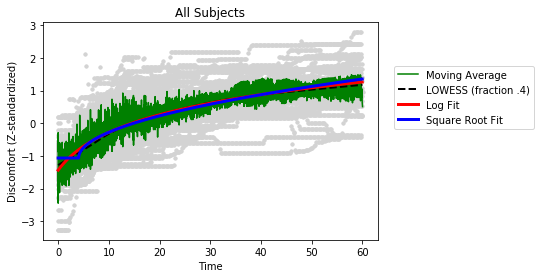

In [31]:
all_total_scaled_beforeFirstBlink(18)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system d

[ 0.62639671 -2.41995941  2.72779942]
[ 0.33662272 -1.0223373   3.43200096]


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt


root mean square error of func fit= 0.582647711745
root mean square error of sqrt fit= 0.585156126667


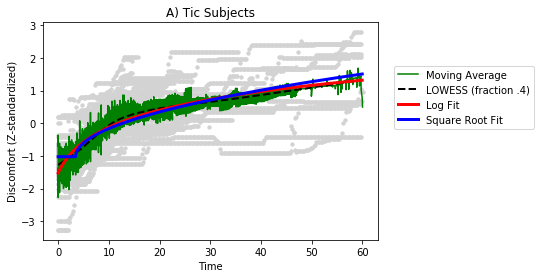

In [44]:
tic_total_scaled_beforeFirstBlink(18)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system d

[ 0.93088578 -4.39151176  9.19777486]
(array([ 0.32138629, -1.01926848,  6.71465419]), 'sqrt fit')
[ 1.11670304 -3.29588838 -0.09104717  9.99012336]


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in exp


root mean square error of func fit= 0.255214841655
root mean square error of sqrt fit= 0.253748150737


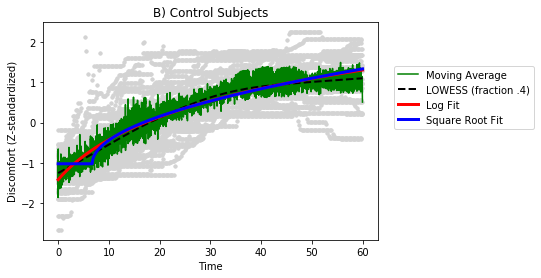

In [40]:
control_total_scaled_beforeFirstBlink(18)